# Exploration of time series data - Yohann

### To do

* [ ] Harmonic regression? (linear gain factor) 
* [ ] Seasonal trend in residuals (make plot of residuals) 
* [ ] Difference method for eliminating seasonality - Yohann 
* [ ] Plot residuals remove seasonal + trend 
    * [ ] Test stationarity av residuals 
* [ ] Find autocorrelation of residuals - Yohann
* [ ] Implement tests for residuals
    * [ ] check if residuals uncorrelated
    * [ ] check if residuals are dependent
    * [ ] check if residuals are gaussian
* [ ] Make model of time series based on results from noise tests (probably a stationary ARMA)

* [ ] Write report
    * [ ] Abstract
    * [ ] Introduction
    * [ ] Theory analysis
    * [ ] Data analysis
    * [ ] Discussion
    * [ ] Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('/mnt/workspace/time_series/monthly_in_situ_co2_mlo.csv', na_values=-99.99, skiprows=55)
df.head()

,Yr,Mn,Date Excel,Date,CO2[ppm],seasonally adjusted[ppm],fit[ppm],seasonally adjusted fit[ppm],CO2 filled[ppm],seasonally adjusted filled[ppm]
0,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [3]:
df.columns

Index(['Yr', 'Mn', 'Date Excel', 'Date', 'CO2[ppm]',
       'seasonally adjusted[ppm]', ' fit[ppm]', 'seasonally adjusted fit[ppm]',
       'CO2 filled[ppm]', ' seasonally adjusted filled[ppm]'],
      dtype='object')

In [4]:
df.drop(['Yr', 'Mn', 'Date Excel'], axis=1, inplace=True)

In [5]:
df.head()

,Date,CO2[ppm],seasonally adjusted[ppm],fit[ppm],seasonally adjusted fit[ppm],CO2 filled[ppm],seasonally adjusted filled[ppm]
0,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [6]:
df.columns

Index(['Date', 'CO2[ppm]', 'seasonally adjusted[ppm]', ' fit[ppm]',
       'seasonally adjusted fit[ppm]', 'CO2 filled[ppm]',
       ' seasonally adjusted filled[ppm]'],
      dtype='object')

### Subplots with and without seasonal adjustment

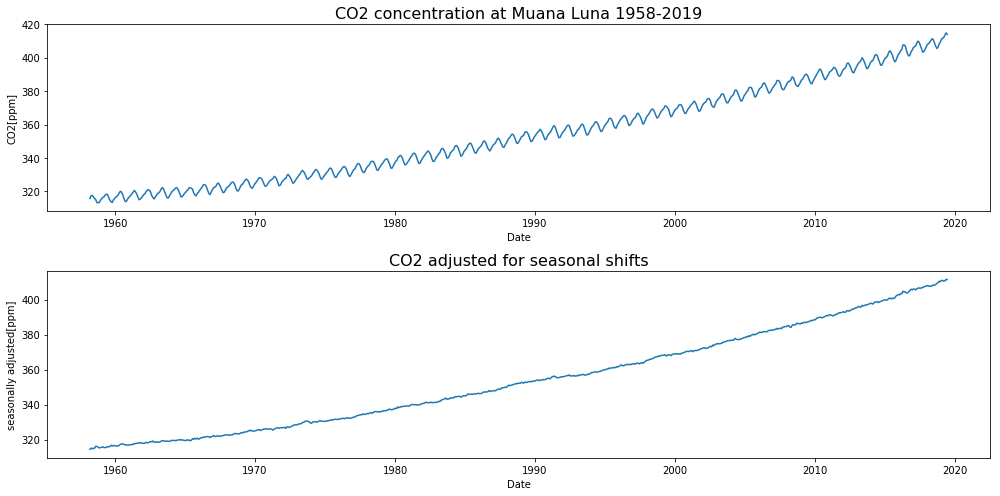

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
g1 = sns.relplot(x='Date', y='CO2[ppm]', data=df, kind='line', ax=ax[0])
g2 = sns.relplot(x='Date', y='seasonally adjusted[ppm]', data=df, kind='line', ax=ax[1])

# You will have to close the additional empty figures returned by replot
plt.close(g1.fig)
plt.close(g2.fig) 

ax[0].set_title('CO2 concentration at Muana Luna 1958-2019', fontsize=16)
ax[1].set_title('CO2 adjusted for seasonal shifts', fontsize=16)

plt.tight_layout()

### Superplot with and without seasonal fit

## Applying method S1 (MA filter) to smooth data

### Trailing MA filter

In [18]:
rawSer = df['CO2[ppm]']
rolling = rawSer.rolling(window=50)
df['MA_3'] = rolling.mean()

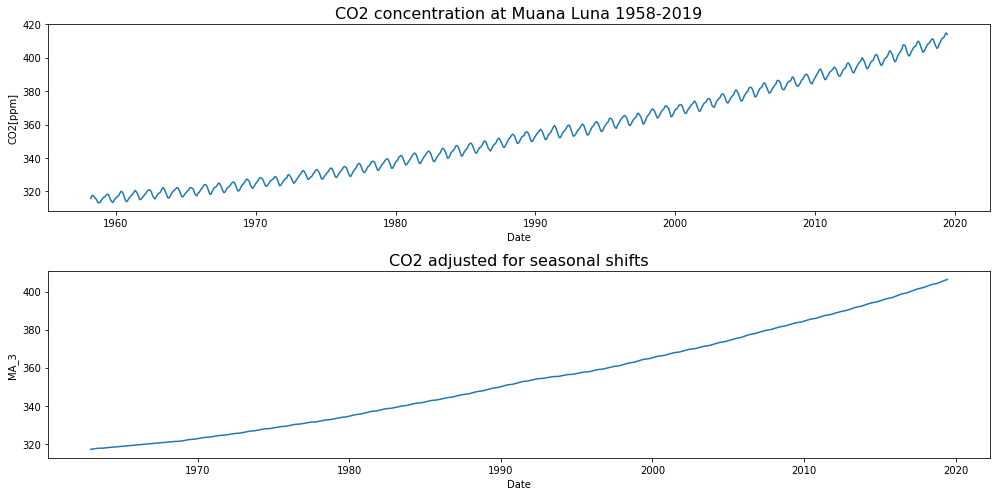

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
g1 = sns.relplot(x='Date', y='CO2[ppm]', data=df, kind='line', ax=ax[0])
g2 = sns.relplot(x='Date', y='MA_3', data=df, kind='line', ax=ax[1])

# You will have to close the additional empty figures returned by replot
plt.close(g1.fig)
plt.close(g2.fig) 

ax[0].set_title('CO2 concentration at Muana Luna 1958-2019', fontsize=16)
ax[1].set_title('CO2 adjusted for seasonal shifts', fontsize=16)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
g1 = sns.relplot(x='Date', y='CO2[ppm]', data=df, kind='line', ax=ax[0])
g2 = sns.relplot(x='Date', y='CO2 trailing MA filter 5', data=df, kind='line', ax=ax[1])

# You will have to close the additional empty figures returned by replot
plt.close(g1.fig)
plt.close(g2.fig) 
plt.tight_layout()

### Centered MA filter